<a href="https://colab.research.google.com/github/SARANYA-36/saaru/blob/main/aiml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
df = pd.read_csv(r'/content/data.csv')
X = df.drop('buy_computer', axis=1)
y = df['buy_computer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train.values, y_train.values)
y_pred = model.predict(X_test.values)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
new_data = np.array([[35, 60000, 1, 100]])
prediction = model.predict(new_data)
print("Prediction:", prediction)


Accuracy: 0.75
Prediction: [1]


Predicted weight for new waist values: 75
Mean squared Error: 0.0
R_squared: 1.0


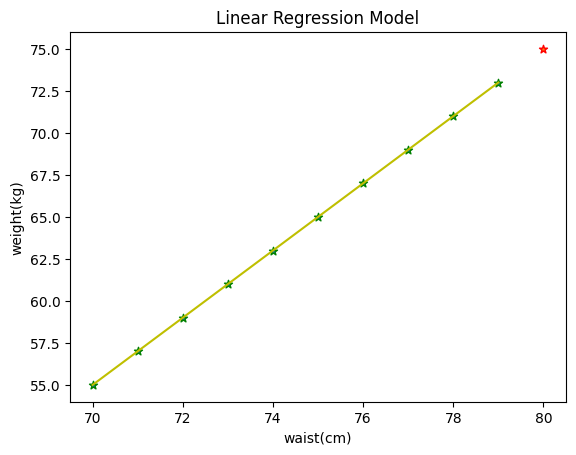

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
waist = np.array([70,71,72,73,74,75,76,77,78,79])
weight = np.array([55,57,59,61,63,65,67,69,71,73])
data = pd.DataFrame({'waist':waist,'weight':weight})
x= data[['waist']]
y = data['weight']
model = LinearRegression()
model.fit(x,y)
new_data = pd.DataFrame({'waist':[80]})
predicted_weight = model.predict(new_data[['waist']])
print("Predicted weight for new waist values:",int(predicted_weight[0]))
y_pred = model.predict(x)
mse = mean_squared_error(y,y_pred)
print('Mean squared Error:',mse)
r2 = r2_score(y,y_pred)
print('R_squared:',r2)
plt.scatter(x,y,marker = '*',edgecolors = 'g')
plt.scatter(new_data,predicted_weight,marker = '*',edgecolors = 'r')
plt.plot(x,y_pred,color = 'y')
plt.xlabel('waist(cm)')
plt.ylabel('weight(kg)')
plt.title('Linear Regression Model')
plt.show()


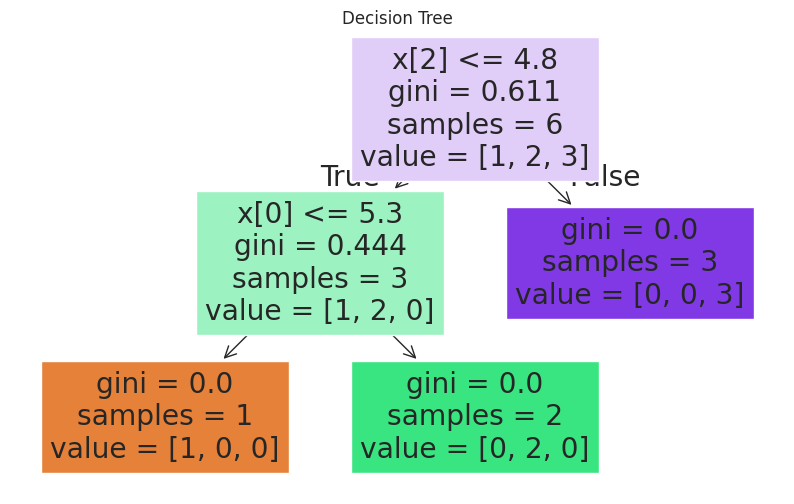

NameError: name 'RandomForestclassifier' is not defined

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
data = pd.read_csv(r'/content/flowers.csv')
x = data.iloc[:,:-1].values
y = data.iloc[:, -1].values
le = LabelEncoder()
y = le.fit_transform(y)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)
tree = DecisionTreeClassifier().fit(x_train,y_train)
plt.figure(figsize = (10,6))
plot_tree(tree,filled = True)
plt.title("Decision Tree")
plt.show()
rf = RandomForestclassifier(n_estimators = 100, random_state = 0).fit(x_train,y_train)
plt.figure(figsize = (20,12))
for i,tree_in_forest in enumerate(rf.estimators_[:6]):
    plt.subplot(2,3,i+1)
    plt.axs('off')
    plot_tree(tree_in_forest,filled = True,rounded = True)
    plt.title("Tree",str(i+1))
plt.subtitle("Random Forest")
plt.show()
print("Accuracy of decision tree:{:.2f}".format(tree.score(x_test,y_test)))
print("Accuracy of random forest: {:.2f}".format(rf.score(x_test,y_test)))


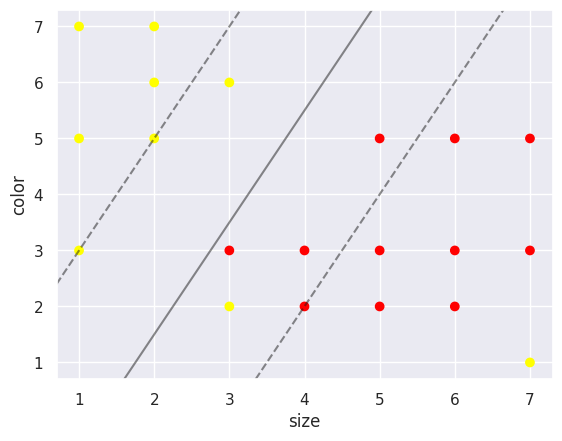

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
x = np.array([[5,2],[4,3],[1,7],[2,6],[5,5],[7,1],[6,2],[5,3],[3,6],[2,7],[6,3],[3,3],[1,5],[7,3],[6,5],[2,5],[3,2],[7,5],[1,3],[4,2]])
y = np.array([0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,1,0,1,0])
clf = svm.SVC(kernel = 'linear')
clf.fit(x,y)
colors = ['red' if label == 0 else 'yellow' for label in y]
plt.scatter(x[:,0],x[:,1],c = colors)
ax = plt.gca()
ax.set_xlabel('size')
ax.set_ylabel('color')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx,yy = np.meshgrid(np.linspace(xlim[0],xlim[1],100),np.linspace(ylim[0],ylim[1],100))
Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx,yy,Z,colors = 'k',levels = [-1,0,1],alpha = 0.5,linestyles = ['--','-','--'])
plt.show()
